In [4]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from simplified_monorotor import Monorotor
import plotting
import testing
import trajectories

pylab.rcParams['figure.figsize'] = 10,10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from controllers import PController

#### Adjust k_p

Try to get rid of the oscillations by adjusting K_P. Is it possible?

If so, how?

If not, think about what else you mightb be able to do to damp out these oscillations.

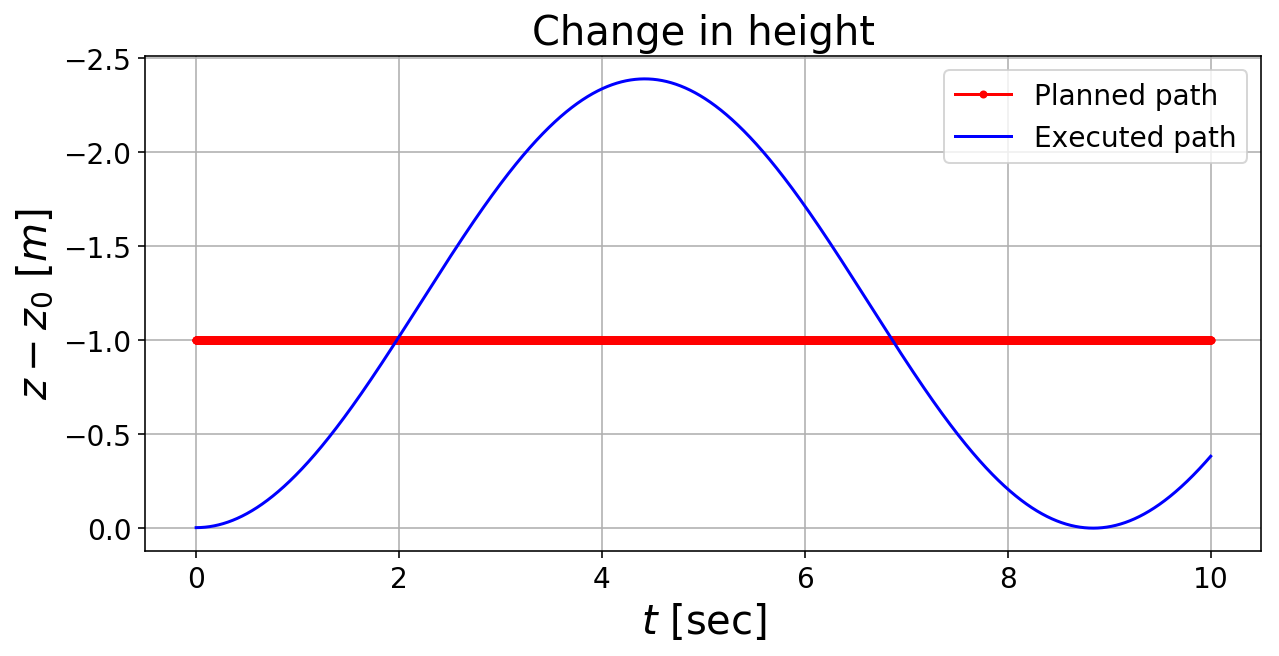

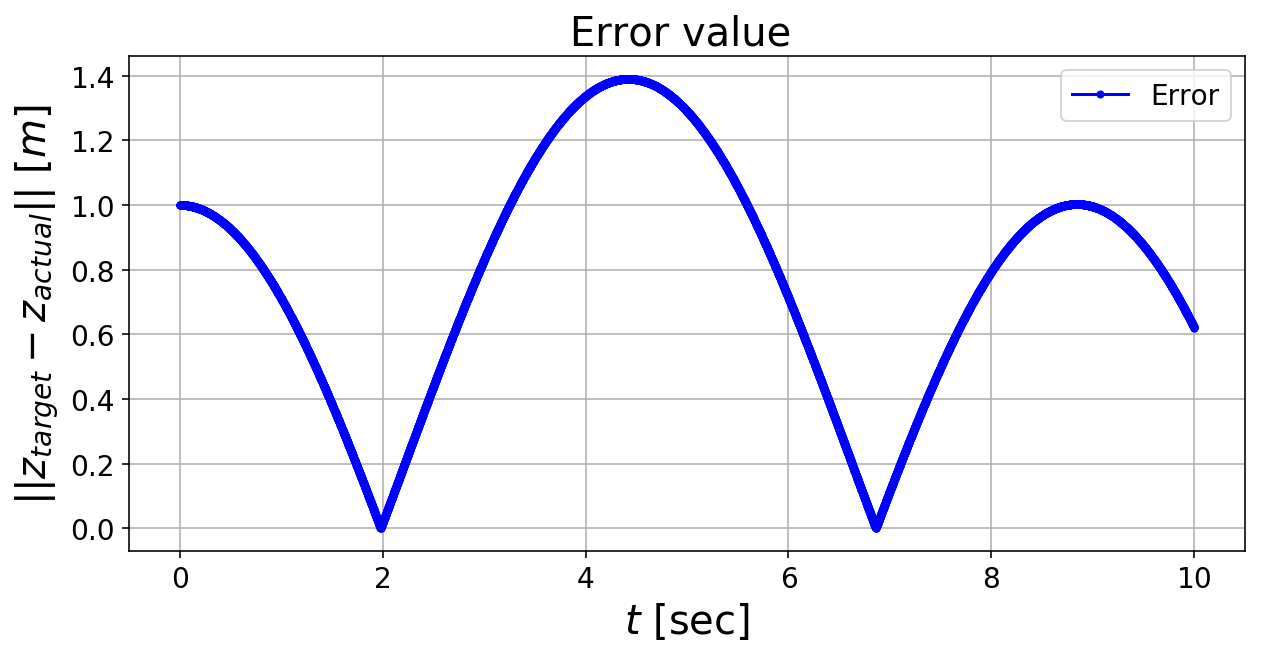

In [8]:
MASS_ERROR = 1.01
K_P = 0.5

# preparation
drone = Monorotor()
perceived_mass = drone.m * MASS_ERROR
controller = PController(K_P, perceived_mass)

# generate trajectory
total_time = 10.0
dt = 0.001
t=np.linspace(0.0,total_time,int(total_time/dt))
z_path= -np.ones(t.shape[0])

# run simulation
history = []
for z_target in z_path:
    z_actual = drone.z
    u = controller.thrust_control(z_target, z_actual)
    drone.thrust = u
    drone.advance_state(dt)
    history.append(drone.X)
    
# generate plots
z_actual = [h[0] for h in history]
plotting.compare_planned_to_actual(z_actual, z_path, t)    